<a href="https://www.kaggle.com/concyclics/simply-view-china-s-urbanization?scriptVersionId=90096863" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('../input/chinas-population-by-gender-and-urbanrural/Chinas Population En.csv',index_col='Unnamed: 0')
df.columns.name='Year'
df

Year,At the end of the total population (ten thousand people),The male population (ten thousand people),Female population (ten thousand people),Urban population (ten thousand people),Rural population (ten thousand people)
2021,141260,72311,68949,91425,49835
2020,141212,72357,68855,90220,50992
2019,141008,72039,68969,88426,52582
2018,140541,71864,68677,86433,54108
2017,140011,71650,68361,84343,55668
...,...,...,...,...,...
1953,58796,30468,28328,7826,50970
1952,57482,29833,27649,7163,50319
1951,56300,29231,27069,6632,49668
1950,55196,28669,26527,6169,49027


In [3]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "dark")

In [4]:
df_urban=df[['Urban population (ten thousand people)','Rural population (ten thousand people)']]

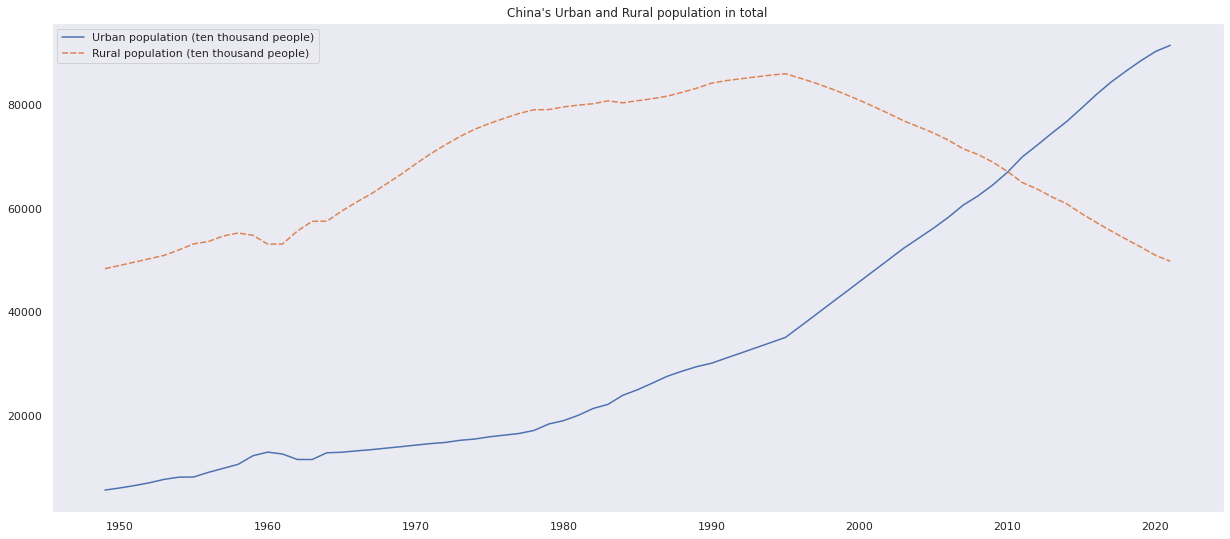

In [5]:
plt.figure(figsize=(21,9))
sns.lineplot(data=df_urban)
plt.title("China's Urban and Rural population in total")
plt.legend()

In [6]:
df_proportion=df['Urban population (ten thousand people)']/df['At the end of the total population (ten thousand people)']
df_proportion=pd.DataFrame(df_proportion)
df_proportion.columns=['urban population proportion']
df_proportion.columns.name='Year'
df_proportion

Year,urban population proportion
2021,0.647211
2020,0.638898
2019,0.627099
2018,0.615002
2017,0.602403
...,...
1953,0.133104
1952,0.124613
1951,0.117798
1950,0.111765


In [7]:
df_urban=df['Urban population (ten thousand people)']
df_urban=pd.DataFrame(df_urban)
df_urban.columns=['urban population total']
df_urban.columns.name='Year'
df_urban

Year,urban population total
2021,91425
2020,90220
2019,88426
2018,86433
2017,84343
...,...
1953,7826
1952,7163
1951,6632
1950,6169


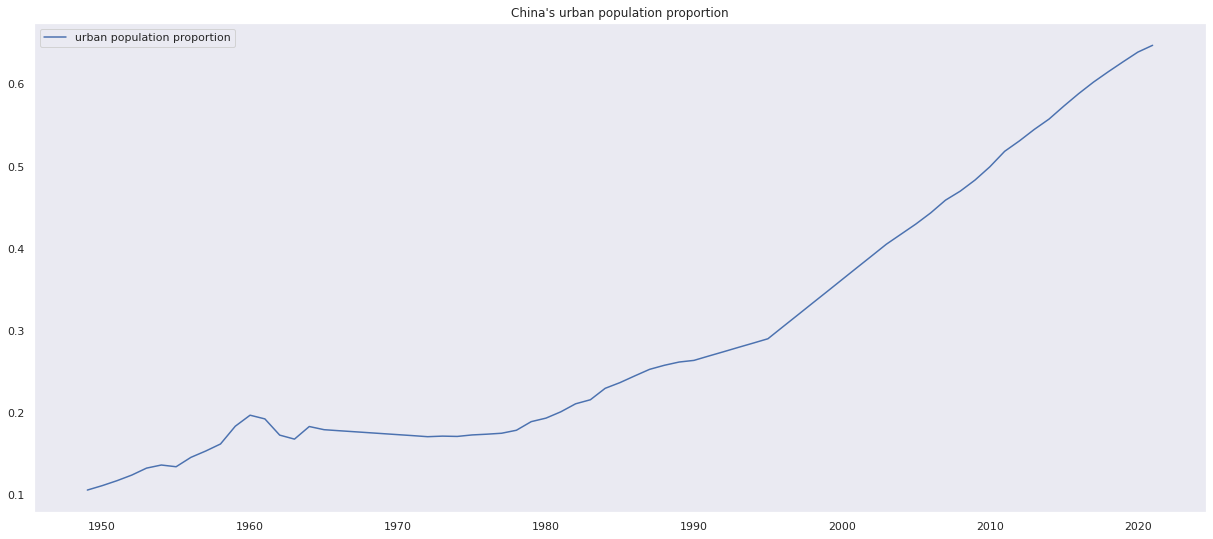

In [8]:
plt.figure(figsize=(21,9))
sns.lineplot(data=df_proportion)
plt.title("China's urban population proportion")
plt.legend()

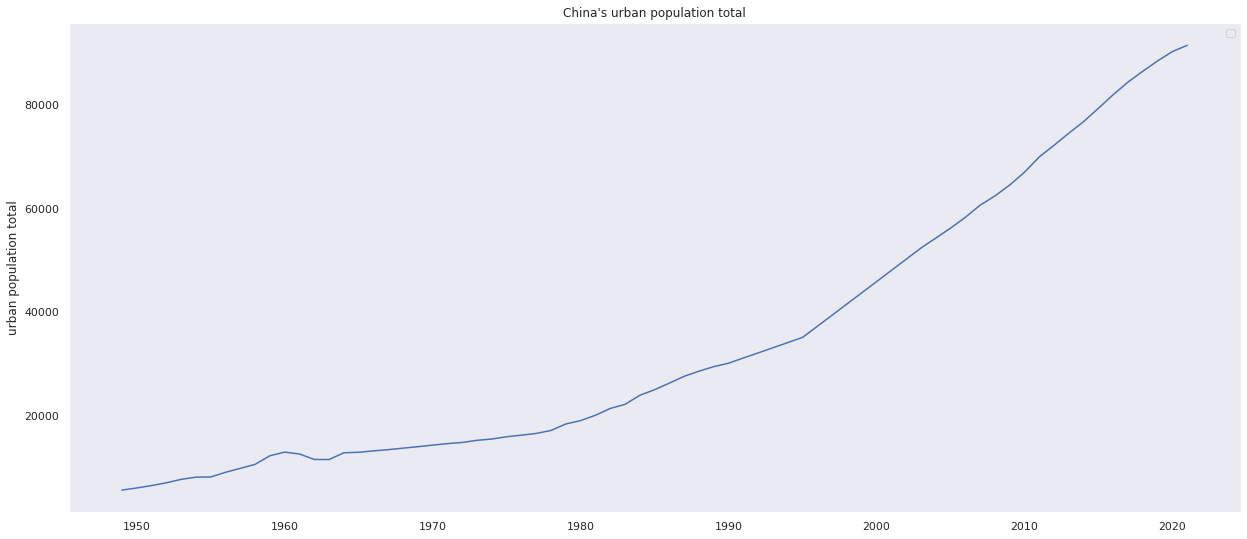

In [9]:
plt.figure(figsize=(21,9))
sns.lineplot(data=df_urban['urban population total'])
plt.title("China's urban population total")
plt.legend()

In [10]:
def set_milestone_proportion(year:int, col_name:str='Unnamed'):
    df_milestone=df_proportion
    df_milestone['Year']=df_milestone.index
    df_milestone[col_name]=['Before' for _ in range(len(df_milestone))]
    df_milestone.loc[2021:year][col_name]=['After' for _ in range(len(df_milestone.loc[2021:year]))]
    return df_milestone

def lmplot_correlation_proportion(year:int, name:str='Unnamed'):
    df_milestone=set_milestone_proportion(year, name)

    sns.lmplot(x='Year', y='urban population proportion', hue=name,data=df_milestone,height=9,aspect=21/9)
    plt.title("China's urban population proportion correlation "+name)

In [11]:
def set_milestone_total(year:int, col_name:str='Unnamed'):
    df_milestone=df_urban
    df_milestone['Year']=df_milestone.index
    df_milestone[col_name]=['Before' for _ in range(len(df_milestone))]
    df_milestone.loc[2021:year][col_name]=['After' for _ in range(len(df_milestone.loc[2021:year]))]
    return df_milestone

def lmplot_correlation_total(year:int, name:str='Unnamed'):
    df_milestone=set_milestone_total(year, name)

    sns.lmplot(x='Year', y='urban population total', hue=name,data=df_milestone,height=9,aspect=21/9)
    plt.title("China's urban population total correlation "+name)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


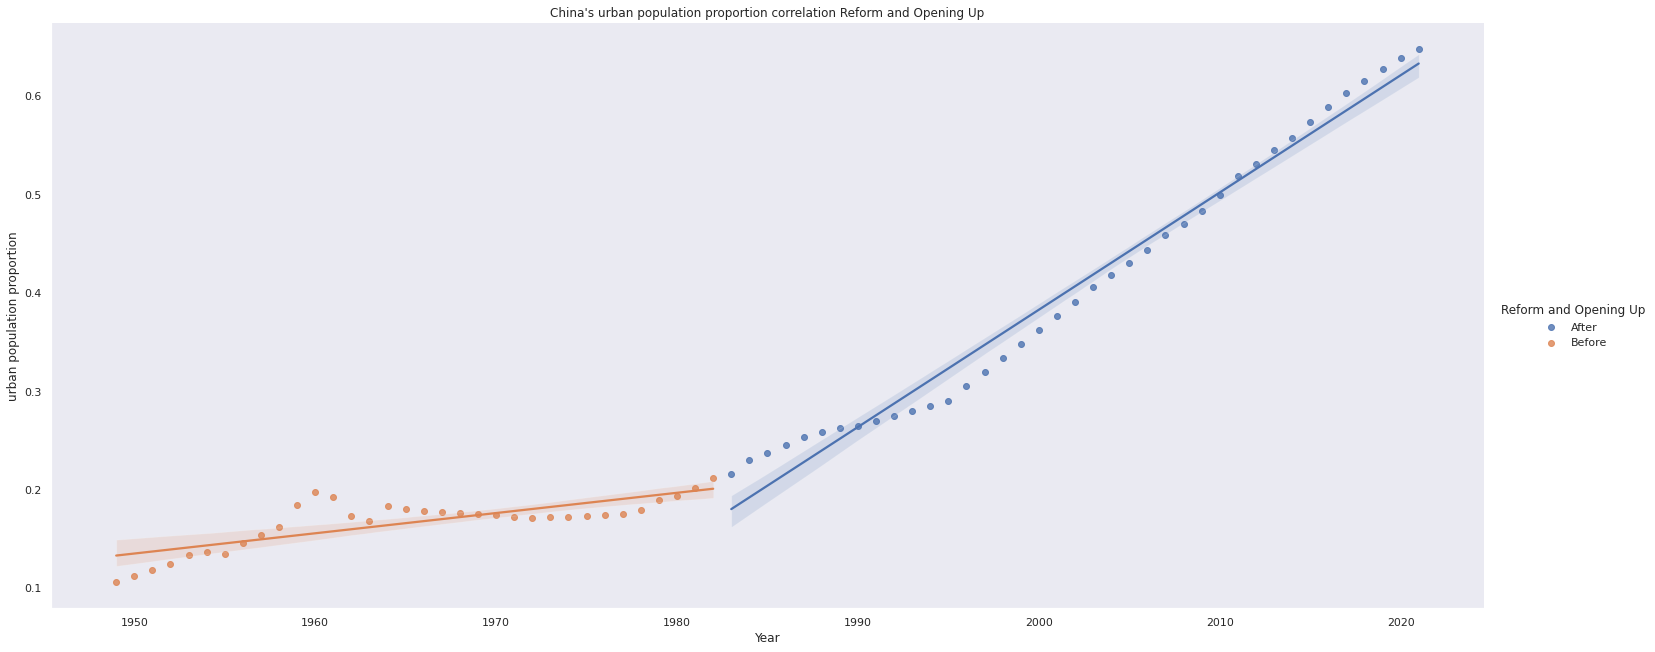

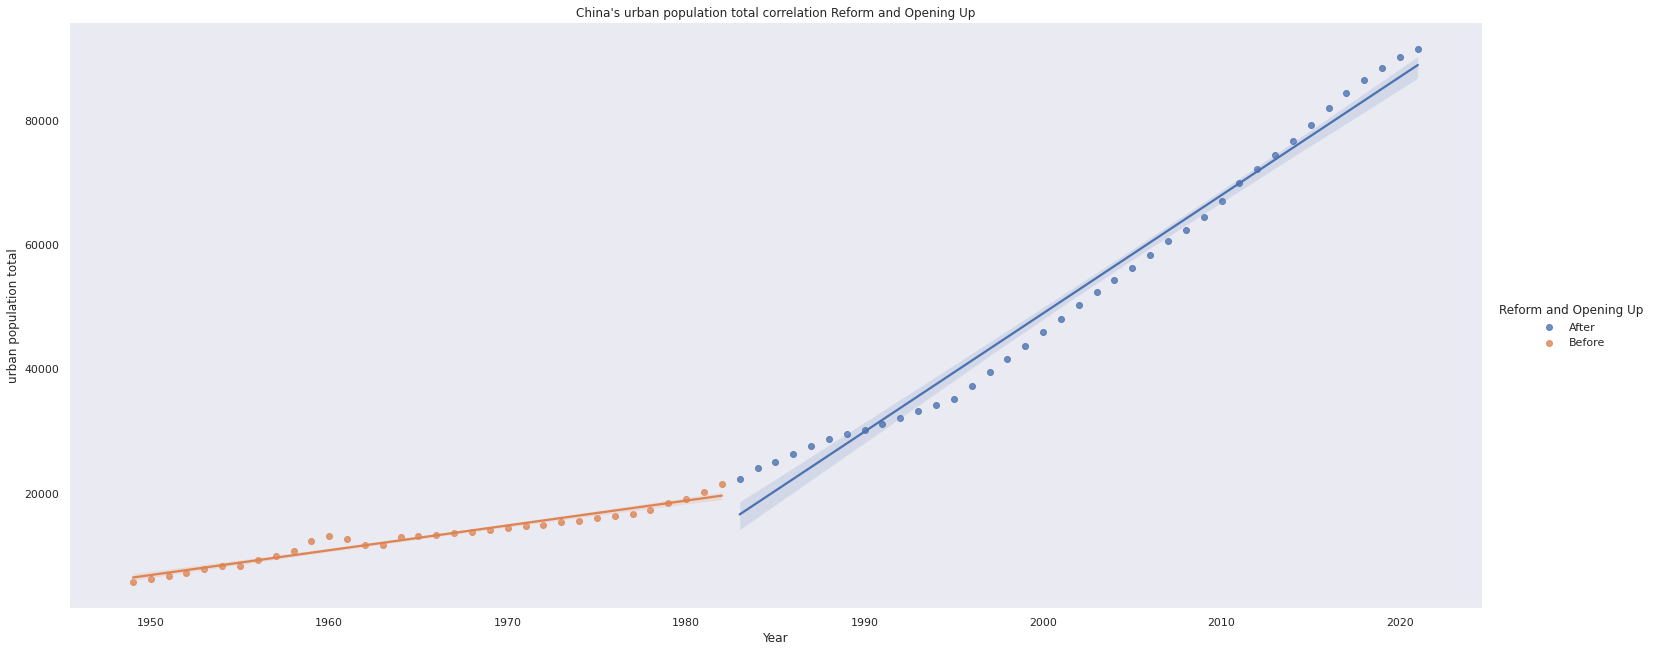

In [12]:
lmplot_correlation_proportion(1983, 'Reform and Opening Up')
plt.savefig('China\'s urban population proportion correlation Reform and Opening Up.png')
lmplot_correlation_total(1983, 'Reform and Opening Up')
plt.savefig('China\'s urban population total correlation Reform and Opening Up.png')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


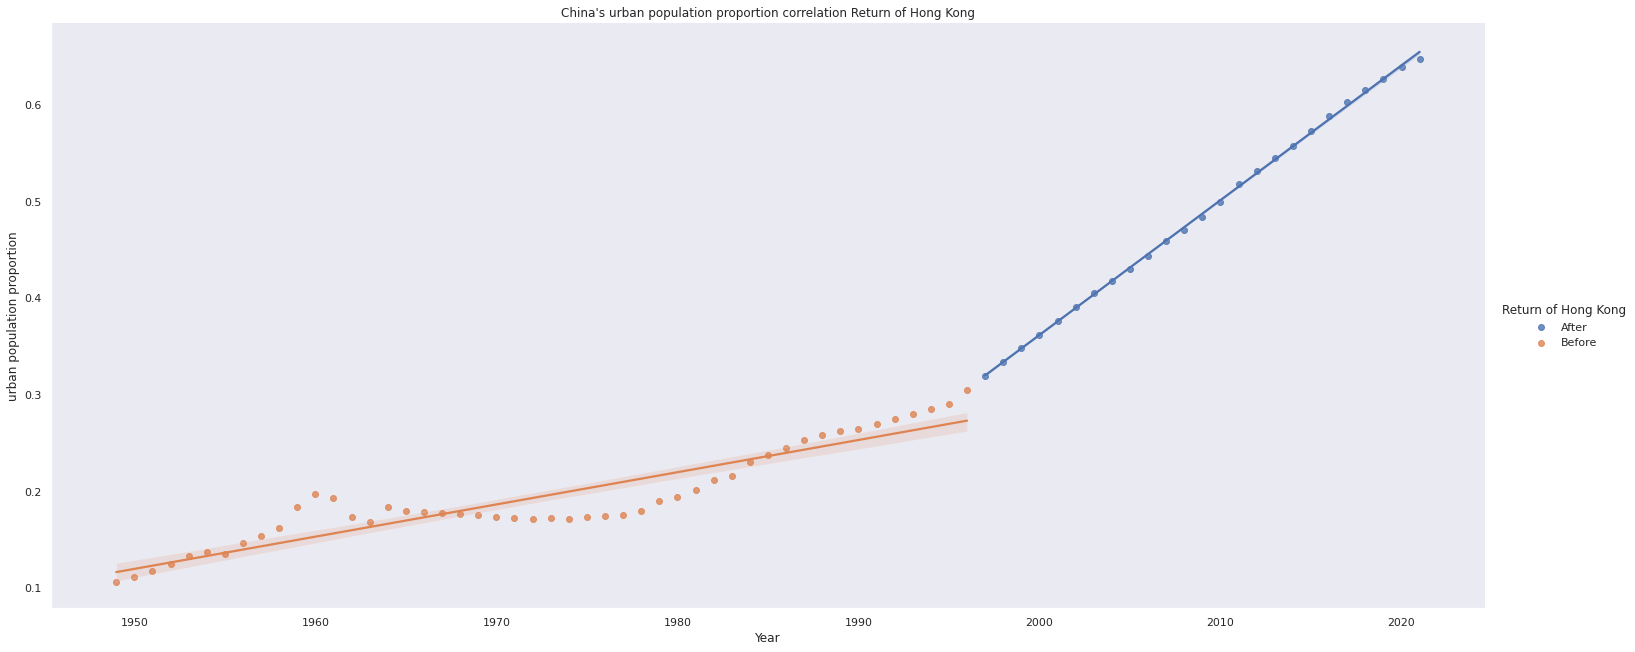

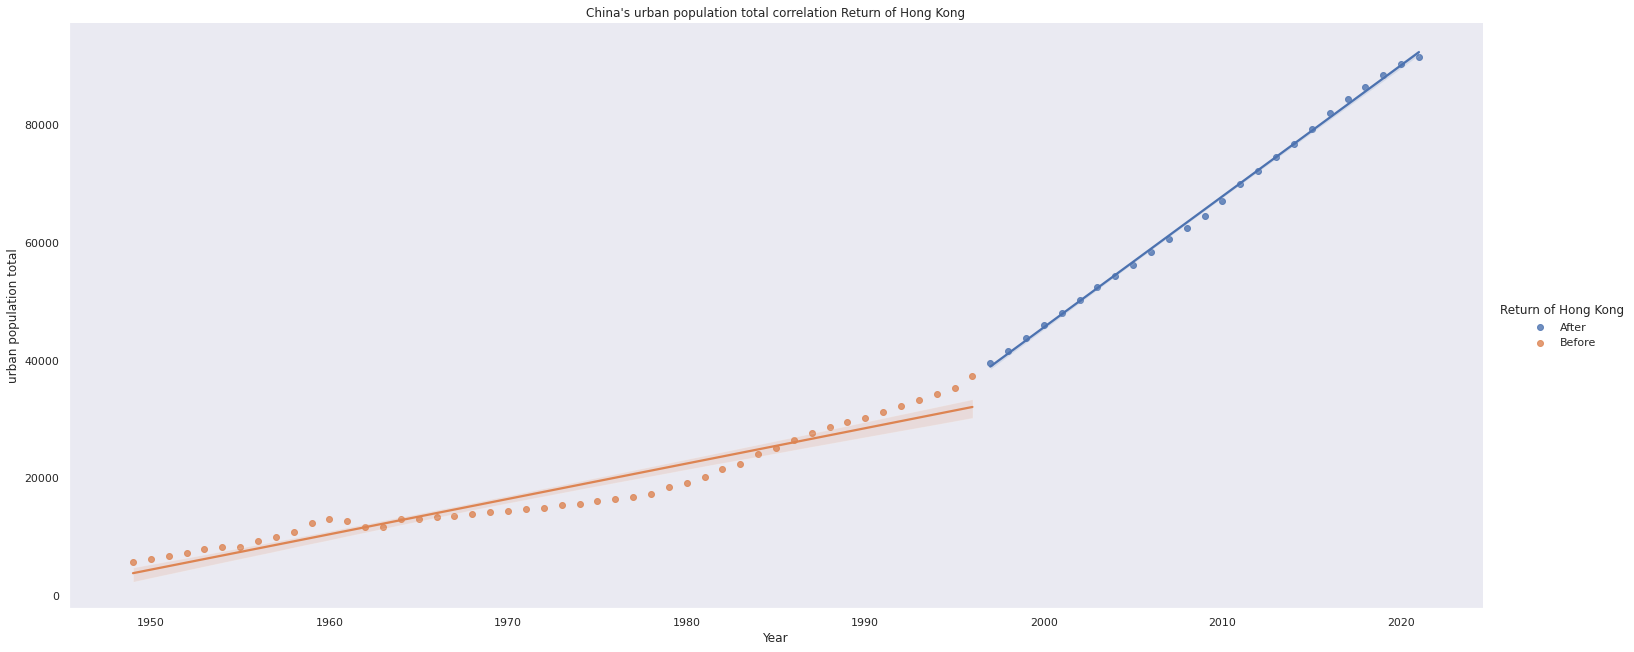

In [13]:
lmplot_correlation_proportion(1997,'Return of Hong Kong')
lmplot_correlation_total(1997,'Return of Hong Kong')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


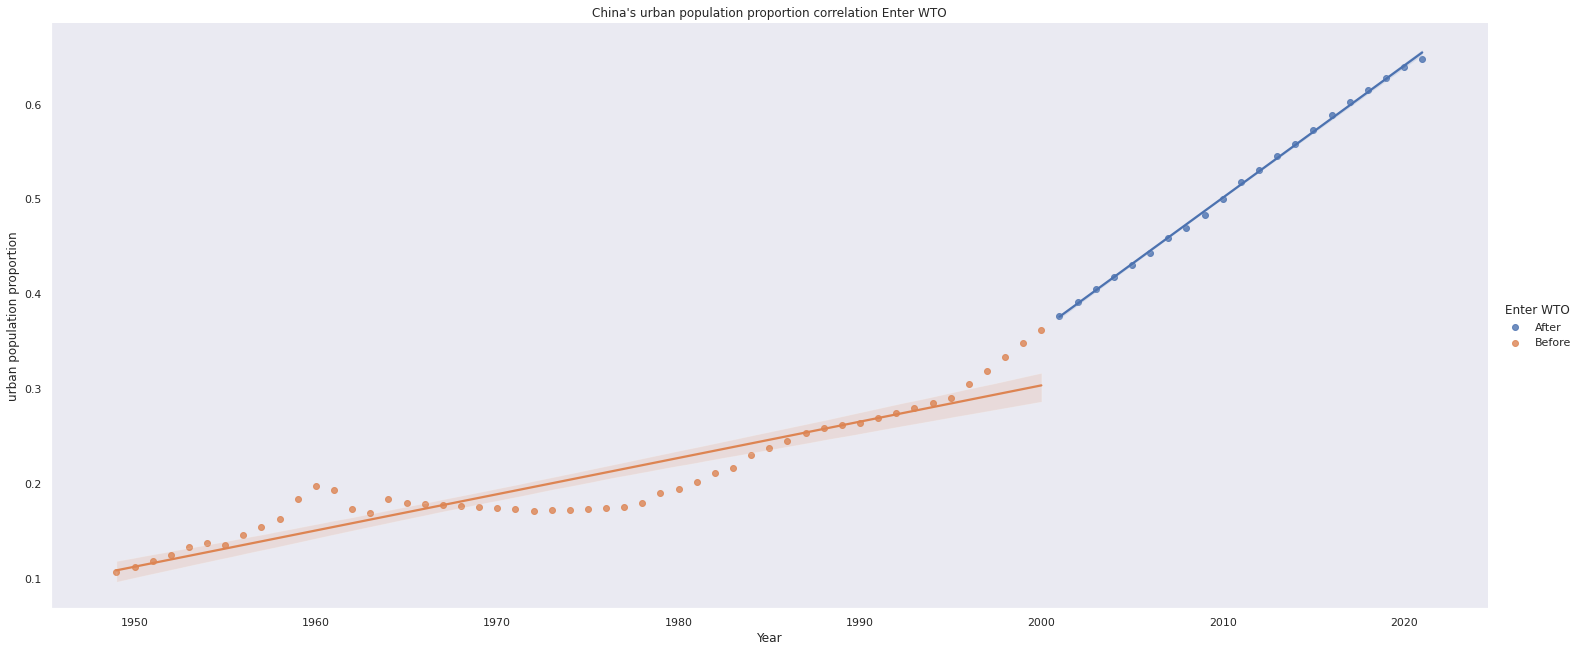

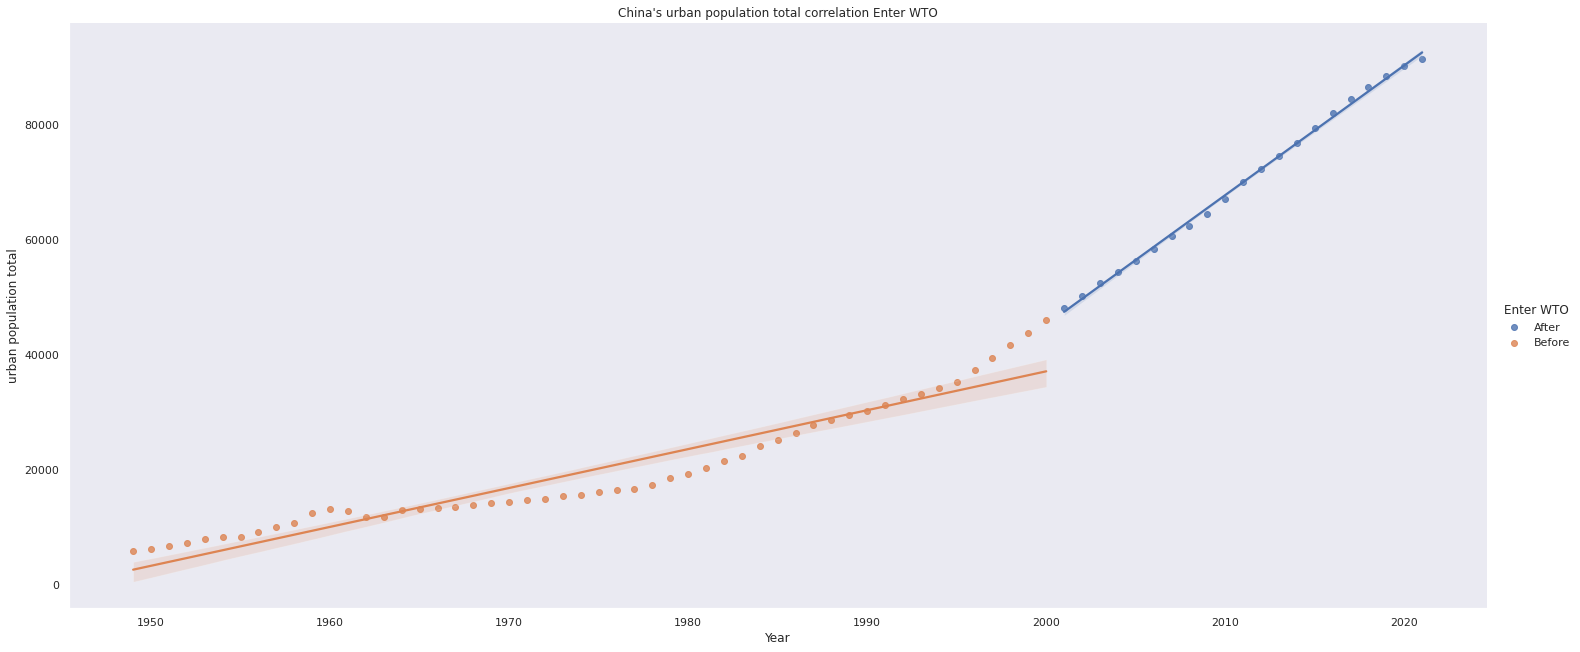

In [14]:
lmplot_correlation_proportion(2001,'Enter WTO')
lmplot_correlation_total(2001,'Enter WTO')